In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
file_path = "customer.csv"  # Change this if needed
df = pd.read_csv(file_path)

In [3]:
# Display first few rows of the dataset
df.head()

,Age,Income ($),Purchase Frequency (per month),Previous Complaints,Purchased (Target: Yes/No)
0,22,20000,2,No,No
1,25,25000,3,No,No
2,28,30000,4,No,Yes
3,30,35000,5,No,Yes
4,35,40000,5,Yes,Yes


In [4]:
# Encode categorical features
label_enc = LabelEncoder()
df['Previous Complaints'] = label_enc.fit_transform(df['Previous Complaints'])
df['Purchased (Target: Yes/No)'] = label_enc.fit_transform(df['Purchased (Target: Yes/No)'])

In [5]:
# Define features and target variable
X = df.drop(columns=['Purchased (Target: Yes/No)'])
y = df['Purchased (Target: Yes/No)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             10 non-null     int64
 1   Income ($)                      10 non-null     int64
 2   Purchase Frequency (per month)  10 non-null     int64
 3   Previous Complaints             10 non-null     int32
 4   Purchased (Target: Yes/No)      10 non-null     int32
dtypes: int32(2), int64(3)
memory usage: 448.0 bytes


,Age,Income ($),Purchase Frequency (per month),Previous Complaints,Purchased (Target: Yes/No)
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,39.00000,50000.000000,5.500000,0.400000,0.800000
std,13.15717,24152.294577,2.173067,0.516398,0.421637
min,22.00000,20000.000000,2.000000,0.000000,0.000000
25%,28.50000,31250.000000,4.250000,0.000000,1.000000
50%,37.50000,45000.000000,5.500000,0.000000,1.000000
75%,48.75000,67500.000000,6.750000,1.000000,1.000000
max,60.00000,90000.000000,9.000000,1.000000,1.000000


In [6]:
# Train the Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [8]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1 Score: 0.67


In [11]:
# Show the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Abhijit Kavuru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhijit Kavuru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhijit Kavuru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


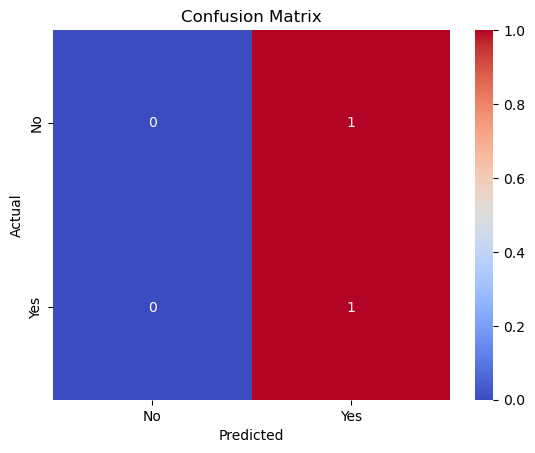

In [12]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt='d', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

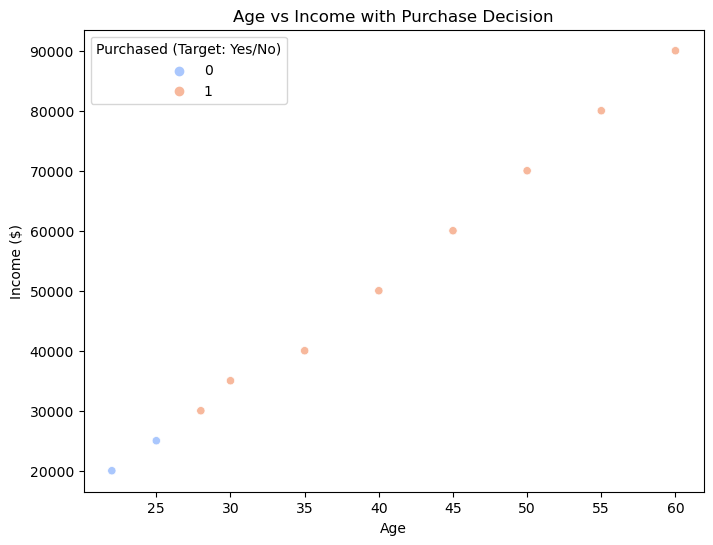

In [14]:
# Plot Age vs. Income colored by Purchase decision
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['Income ($)'], hue=df['Purchased (Target: Yes/No)'], palette='coolwarm')
plt.title('Age vs Income with Purchase Decision')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.show()

In [15]:
# Make a prediction with a sample input
sample = np.array([[32, 37000, 4, 0]])  # Example input: Age=32, Income=37000, Purchase Frequency=4, No Complaints
prediction = model.predict(sample)

# Display prediction result
print("Sample Prediction (1=Yes, 0=No):", prediction[0])

Sample Prediction (1=Yes, 0=No): 1


C:\Users\Abhijit Kavuru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
